# Auto-Regressive (AR) Model

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model   import ARMA
from statsmodels.graphics.tsaplots import plot_pacf

### Simulation of AR model
Plot AR of order 1 model in the form $y[t] = \mu + \phi \cdot y[t-1] + \epsilon[t]$ and corresponding autocorrelation. 
- For **stationarity** AR model need to have $-1 < \phi < 1$;
- if $\phi < 0$ then process is in *mean reversion*
- if $\phi > 0$ then process is in *momentum* 

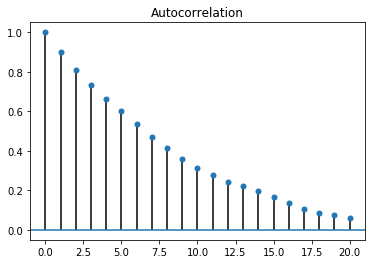

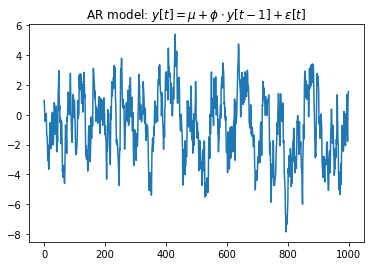

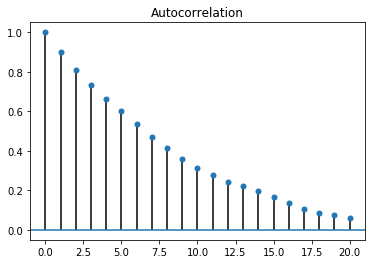

In [62]:
# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9]) # convention [1, −ϕ]
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
#plt.subplot(2, 1, 1)
plt.title('AR model: $y[t] = \mu + \phi \cdot y[t-1] + \epsilon[t]$')
plt.plot(simulated_data_1)
plot_acf(simulated_data_1, alpha = 1, lags = 20)

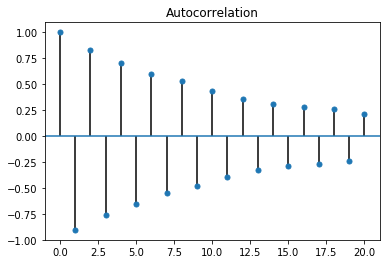

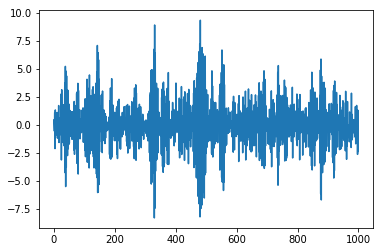

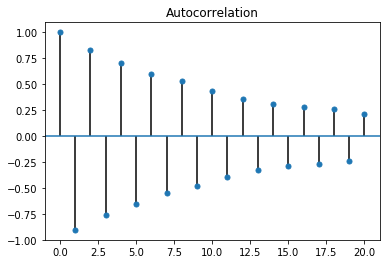

In [39]:
# Plot 2: AR parameter = -0.9
ar2 = np.array([1, +0.9]) # convention [1, −ϕ]
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plot_acf(simulated_data_2, alpha=1, lags=20)

## Estimation of AR model

In [41]:
# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order = (1,0))
res = mod.fit()
# Print out summary information on the fit
print(res.summary())
# Print out the estimate for the constant and for phi
print(f"When the true phi=0.9, the estimate of phi (and the constant) are: {res.params}")

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1414.523
Method:                       css-mle   S.D. of innovations              0.995
Date:                Tue, 19 Mar 2019   AIC                           2835.045
Time:                        15:06:41   BIC                           2849.769
Sample:                             0   HQIC                          2840.641
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2055      0.326     -0.630      0.529      -0.845       0.434
ar.L1.y        0.9045      0.013     67.625      0.000       0.878       0.931
                                    Roots           

### Forecasting with an AR Model
Via `statsmodels` one can also do forecasting, both in-sample and out-of-sample. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the `predict()` method if you want the forecasts in the form of a series of data, or using the `plot_predict()` method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

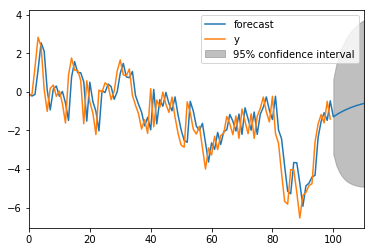

In [50]:
# show fitting from 900 to 1000 and predict future from 1000 to 1010
# note that the time series has 1000 samples
res.plot_predict(start=900, end=1010)
plt.show()

## Estimate Order of Model
There are two techniques used to evaluate the right AR model
- **Partial Autocorrelation function**: it measures the incremental benefit of increasing the order of the AR
- **Information criteria (IC)**: adjust goodness-of-fit for number of parameters via the AIC (Akaike IC) and BIC (Bayesian IC). In practice you fit several models with different number of parameters and one choose the one with the lowest BIC and AIC.


### Partial Autocorrelation function

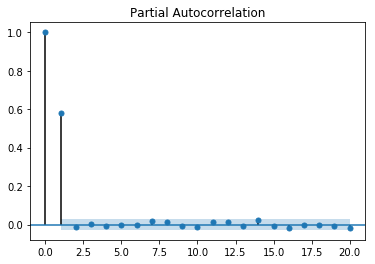

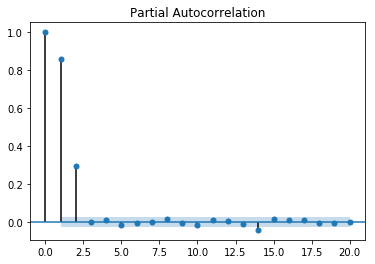

In [54]:
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

Notice that the number of significant lags for the PACF indicate the order of the AR mode

### Information Criteria

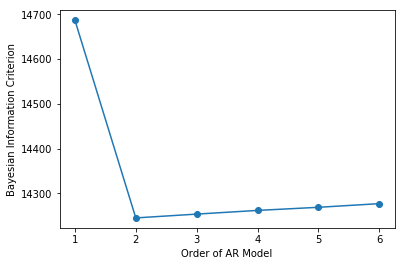

In [55]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p, 0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.